# Nearest Neighbors exercise

In [175]:
#!pip install scipy
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

from sklearn.neighbors import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import *
from sklearn.model_selection import *
from sklearn.metrics import *

## Read different datasets

In [176]:
wine = pd.read_csv('../../datasets/winequality.data.csv')
#Desktop/Python/U_Aalen_MLM/datasets/winequality.data.csv
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [177]:
cancer = pd.read_csv('../../datasets/Breast_cancer_data.csv')

In [178]:
cancer.head()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0

## Classification with the wine quality dataset

The wine quality dataset is a hard to classifiy dataset. You can test that using a logistic regression. We therefore test, wether nearest neighbor classifiers resut in better classifiers for that dataset.

<ol>
<li> Try different features and feature combinations
<li> For a k-NN classifier try different values of k 
<li> If you use a 2-dim feature vector you can use the function plot_decision_regions() for a visualization of the result
<li> What is the best classifier and how does it perform compared to the logisti regression
</ol>    

In [179]:
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [180]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [181]:
wine.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [182]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

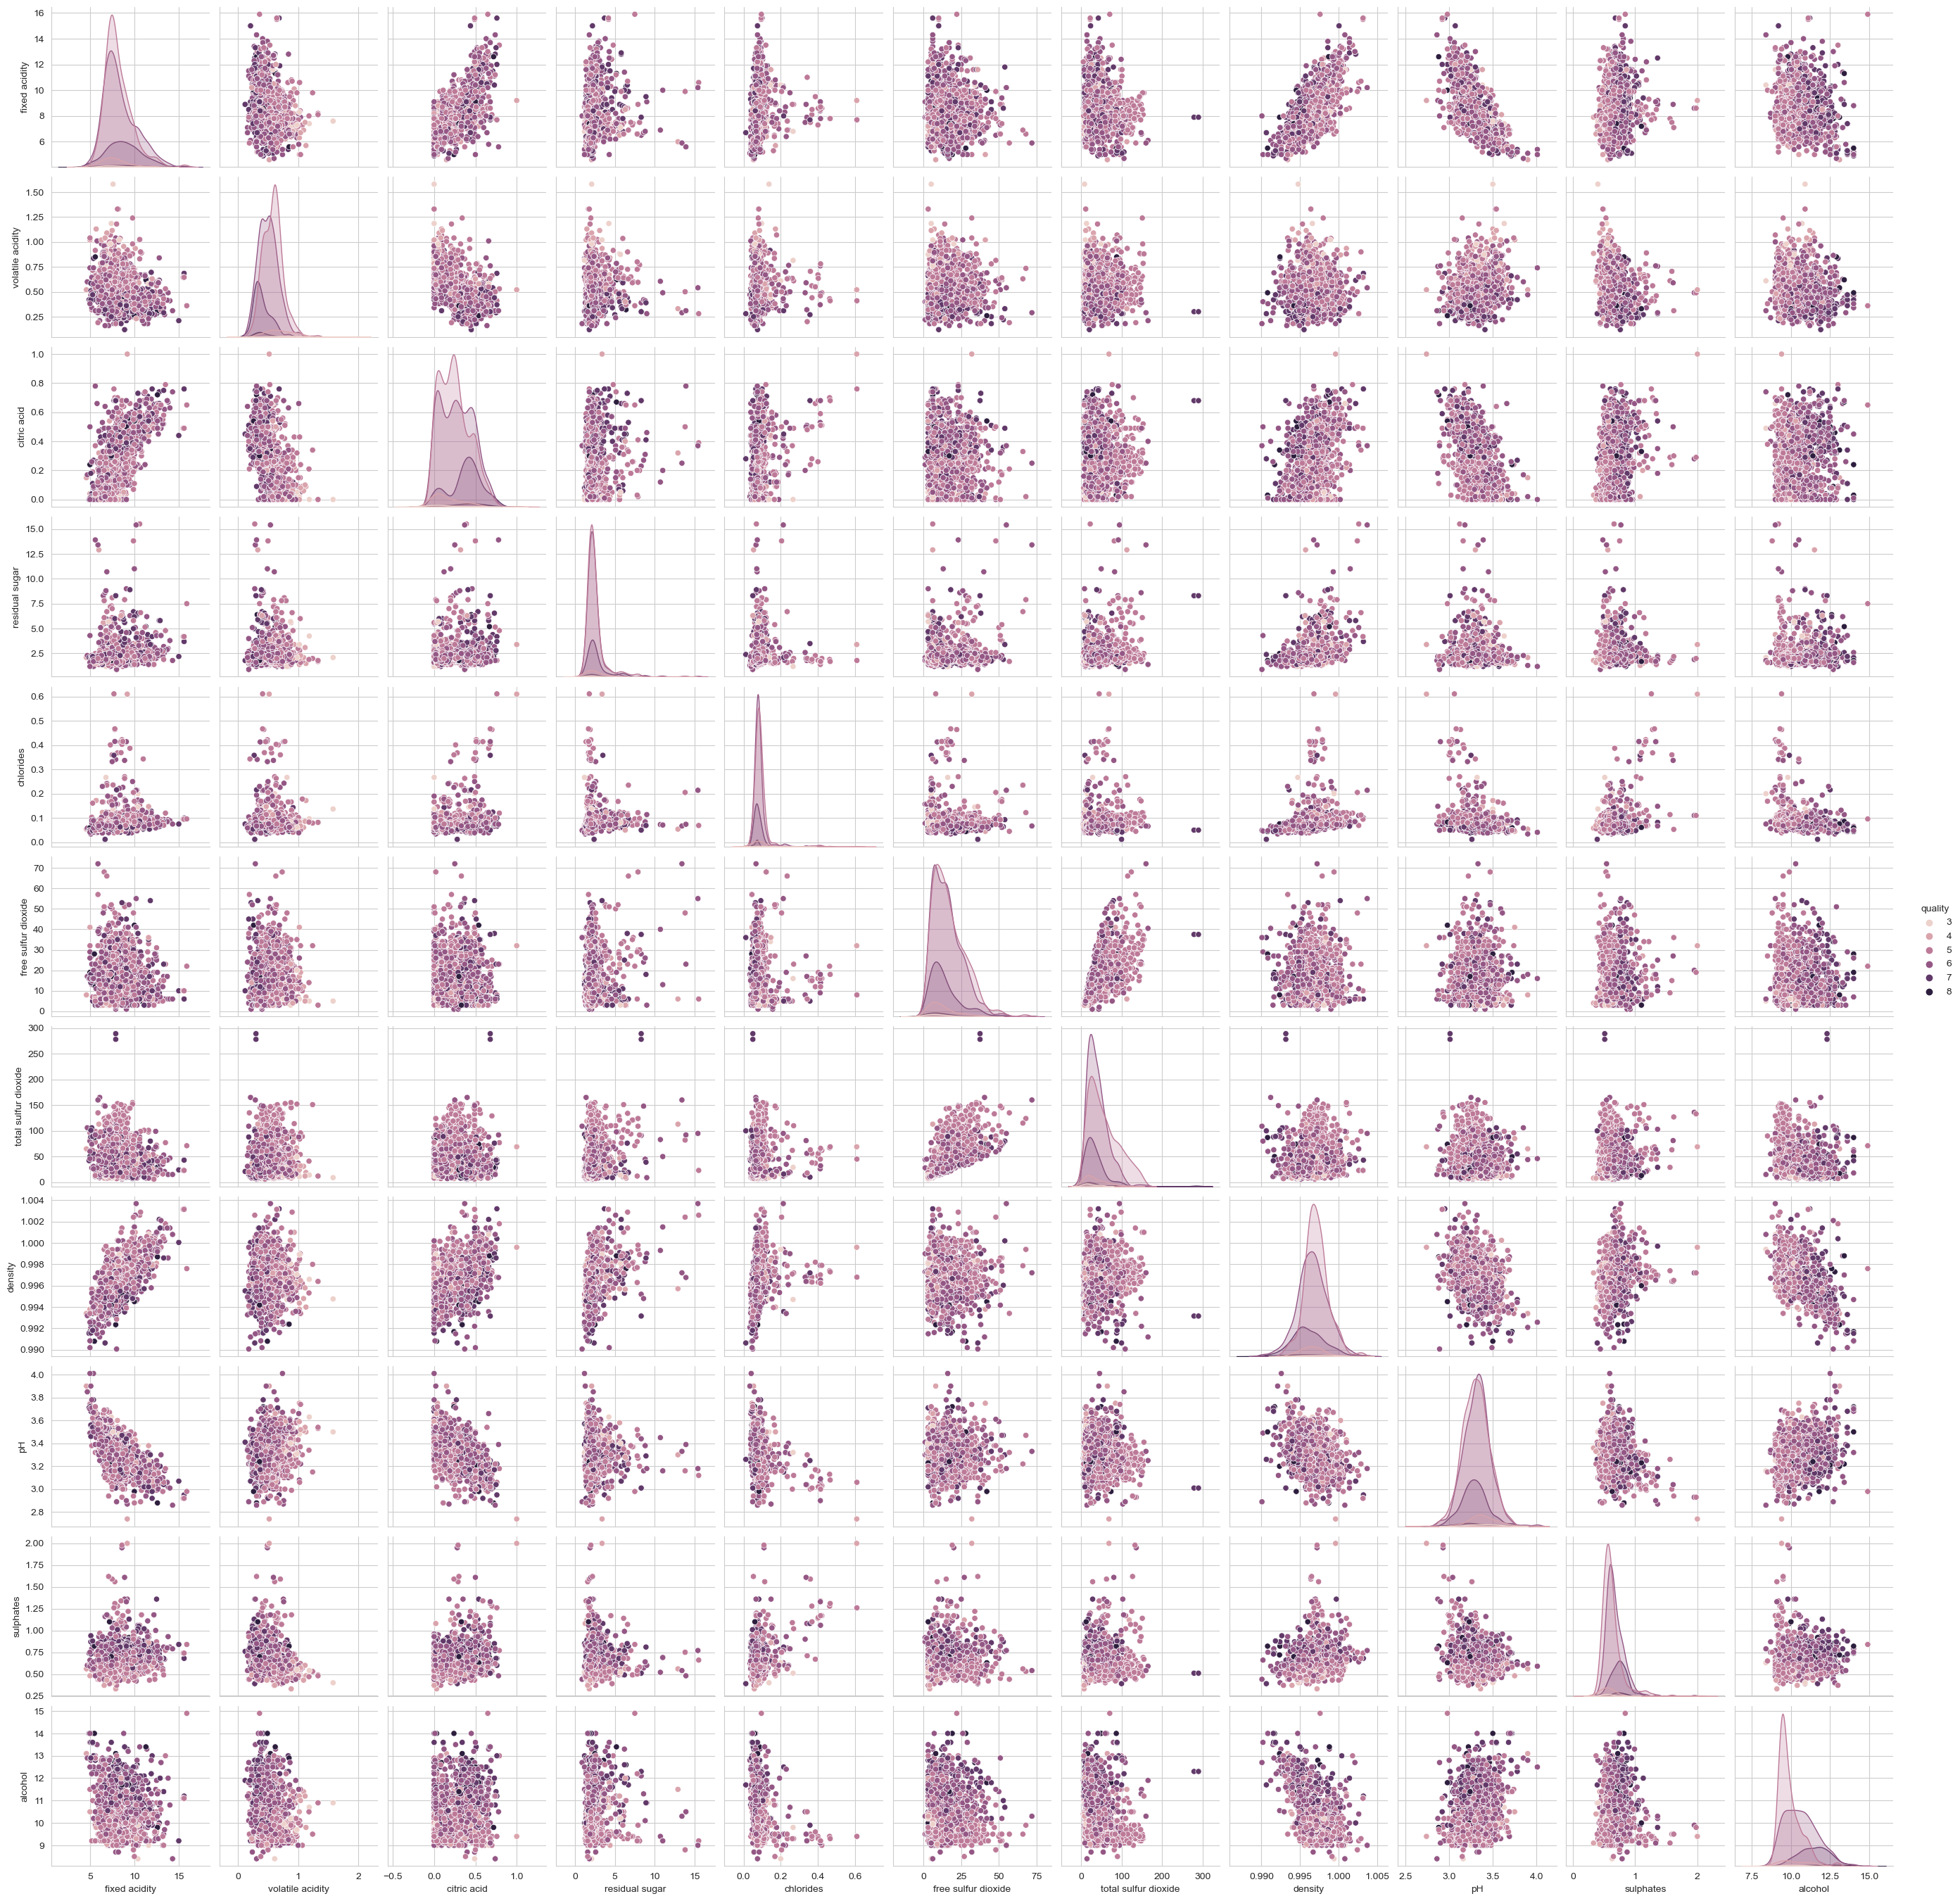

In [183]:
sns.pairplot(data=wine, hue ="quality")

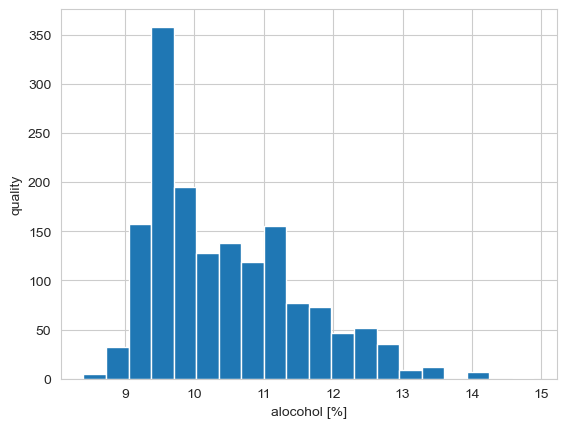

In [184]:
plt.hist(wine['alcohol'],20)
plt.ylabel('quality')
plt.xlabel('alocohol [%]')
plt.show()

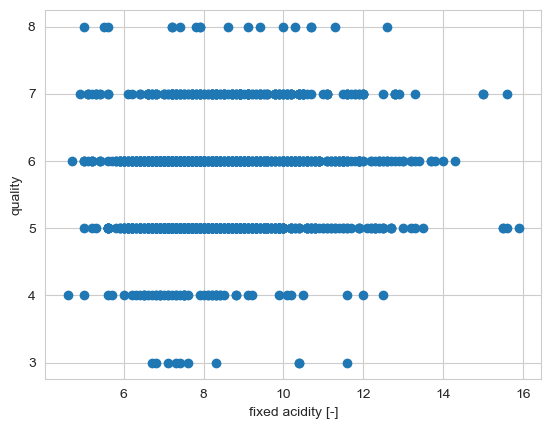

In [185]:
plt.scatter(wine['fixed acidity'],wine['quality'])
plt.ylabel('quality')
plt.xlabel('fixed acidity [-]')
plt.show()

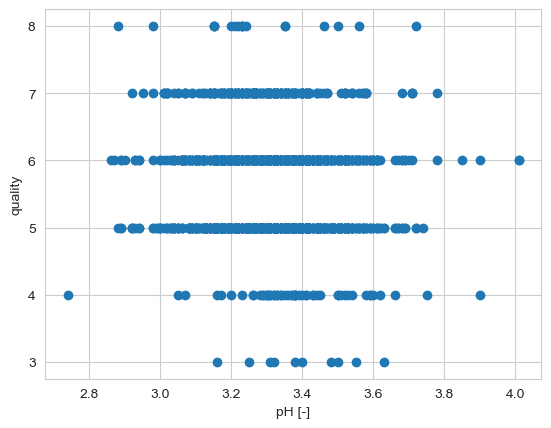

In [186]:
plt.scatter(wine['pH'],wine['quality'])
plt.ylabel('quality')
plt.xlabel('pH [-]')
plt.show()

In [215]:
wine_q = wine[wine['quality']==8]
print("Nr. wines in highest Quality (q=8) = ", len(wine_q))
#print(wine_q)

Nr. wines in highest Quality (q=8) =  18


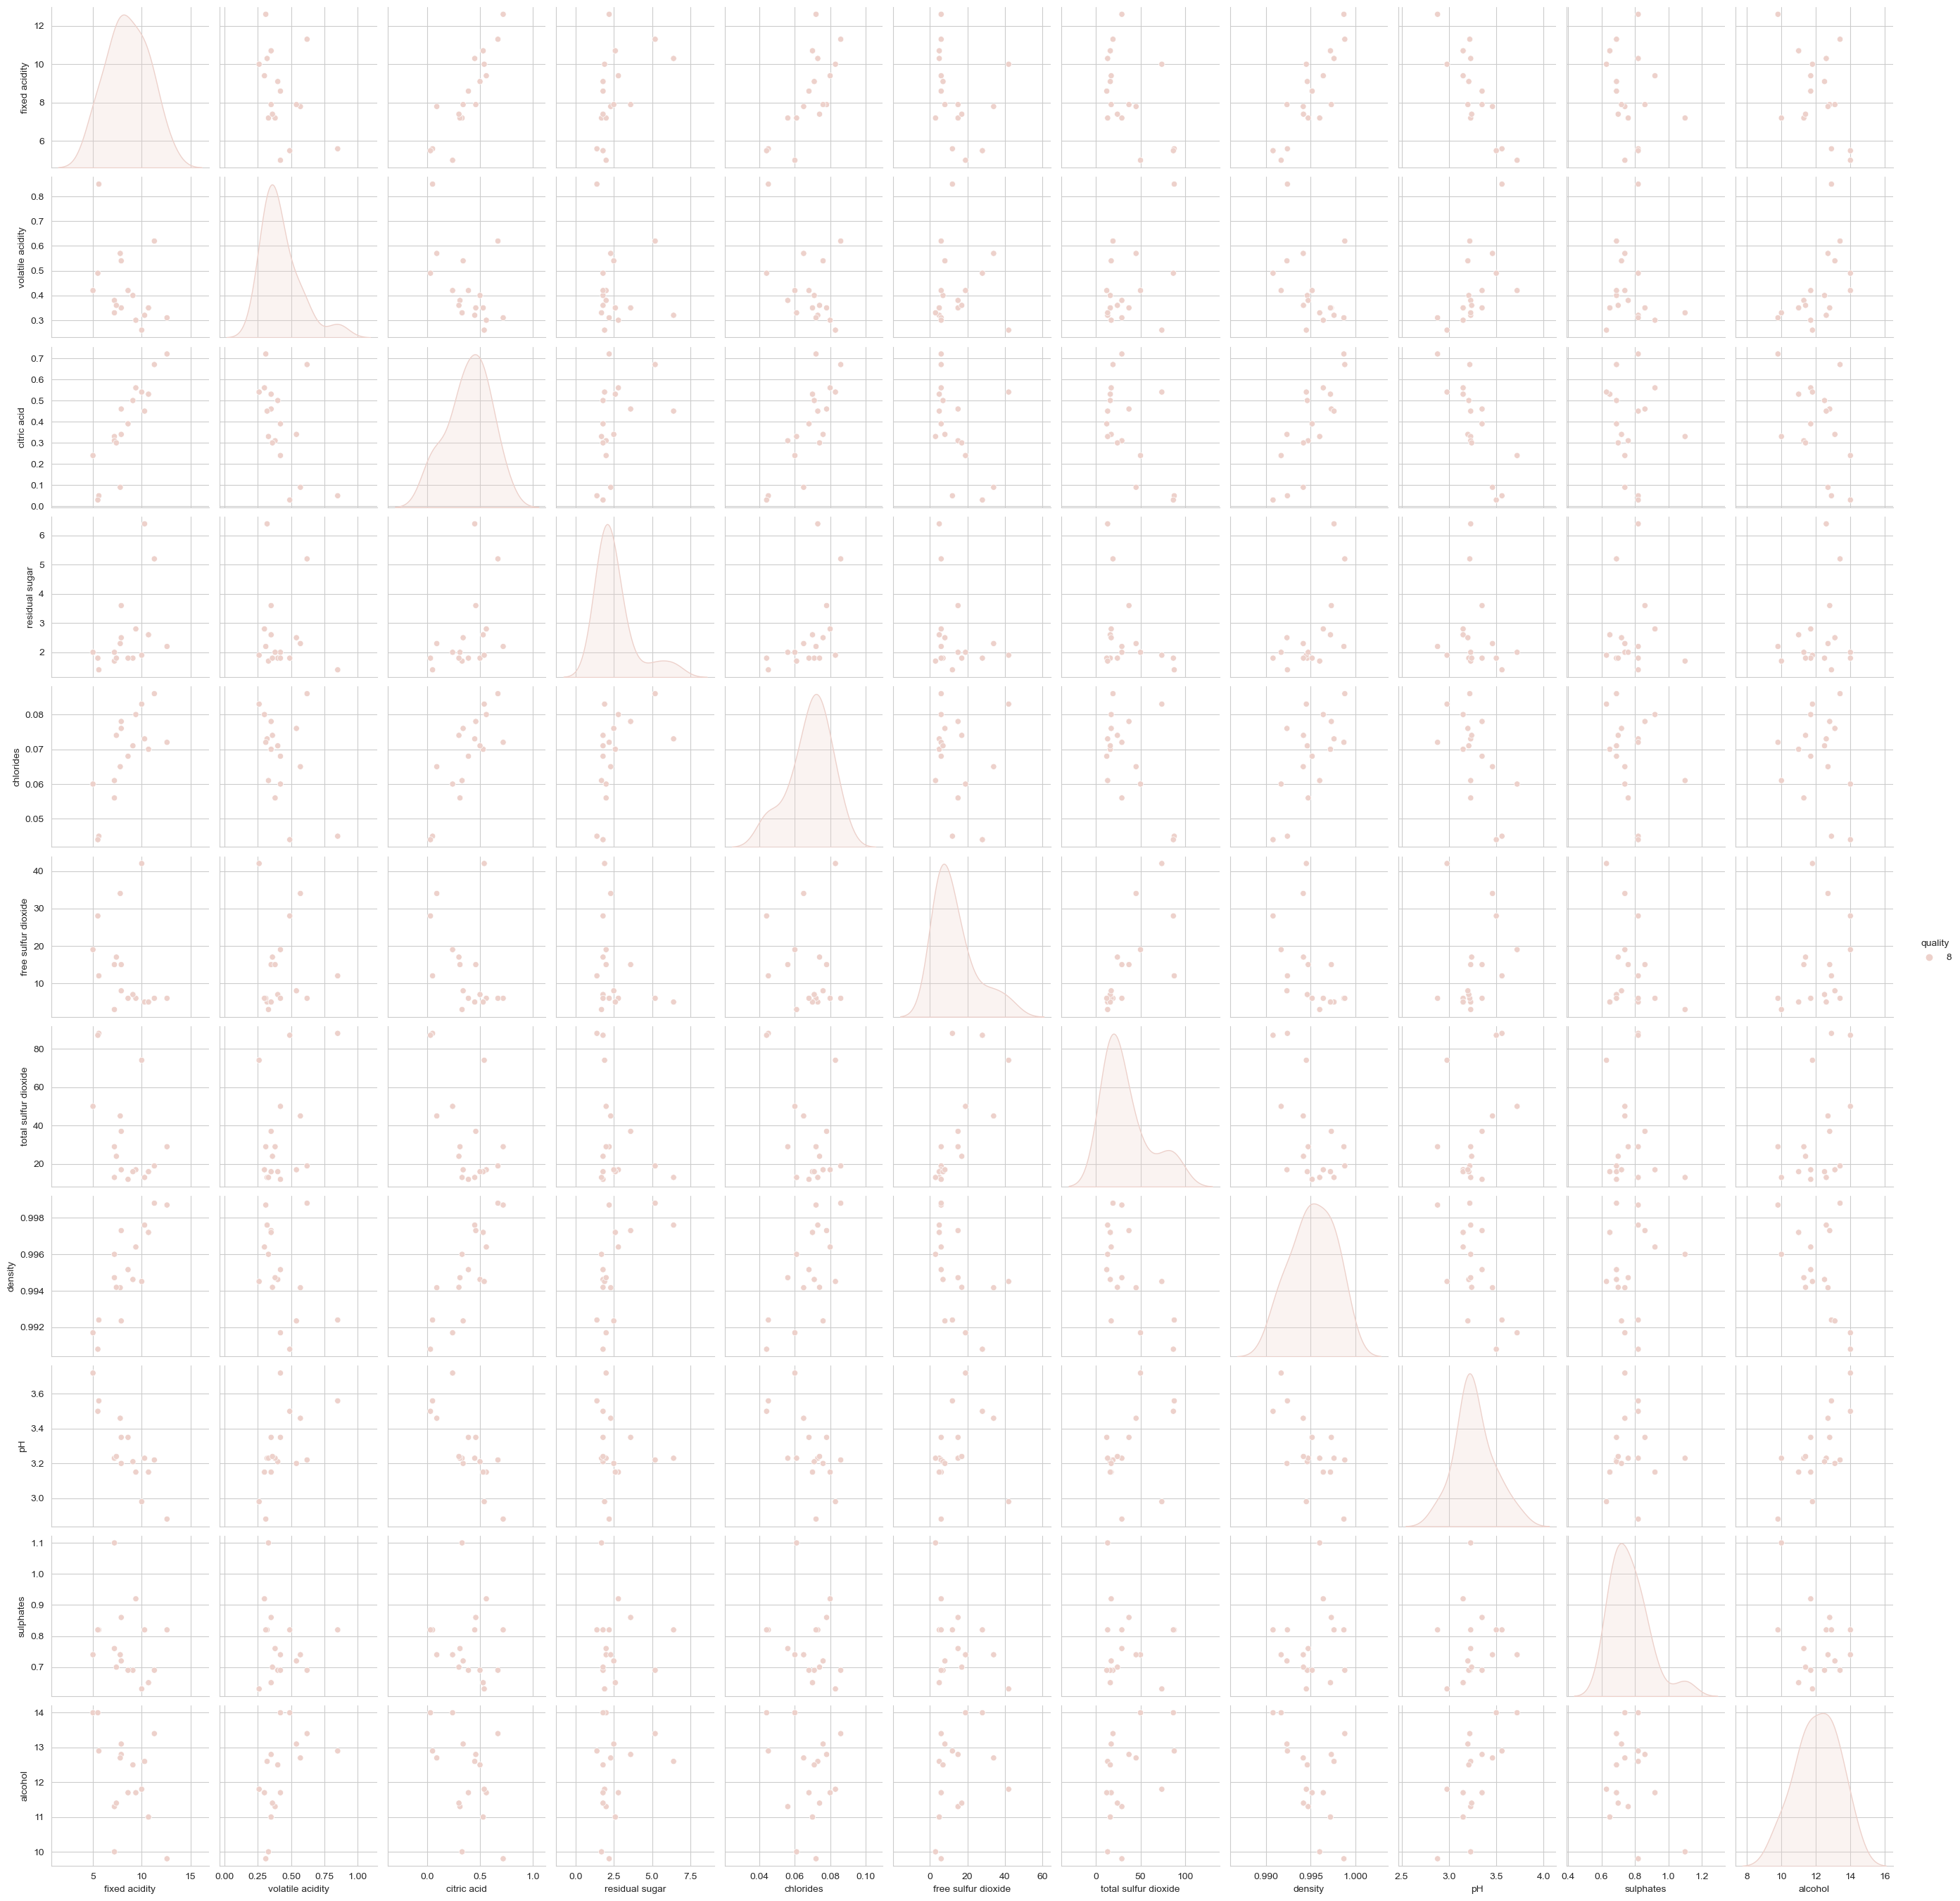

In [216]:
sns.pairplot(data=wine_q, hue ="quality")

In [187]:
N = wine.values.shape[0]
print('N = ',N)
p = wine.values.shape[1]-1
print('p = ',p)

N =  1599
p =  11


In [188]:
#fixed acidity	volatile acidity	citric acid	residual sugar	chlorides	free sulfur dioxide	total sulfur dioxide	density	pH	sulphates	alcohol	quality
y = wine['quality'].values
X = np.vstack([np.ones(N), wine['fixed acidity'], wine['volatile acidity'], wine['citric acid'], wine['residual sugar'], wine['chlorides'], wine['density'], wine['alcohol']])
X = X.T

In [189]:
xtx = np.matmul(X.T, X)
xtxi = np.linalg.inv(xtx)
xtxixt = np.linalg.pinv(X)

beta = np.matmul(xtxixt, y)
H = np.matmul(X, xtxixt)

In [190]:
print(beta)

[ 1.34636462e+01  6.23865215e-02 -1.39342933e+00 -2.84706373e-01
  5.54374205e-04 -2.04848950e-01 -1.08249377e+01  3.13941102e-01]


In [191]:
lr = LogisticRegression().fit(X, y)

In [192]:
beta_1 = np.array([lr.intercept_[0], lr.coef_[0,0], lr.coef_[0,1]])
#beta_1 = beta_1 / beta_1[2]
print(beta_1)

[0.01526505 0.0179604  0.0242755 ]


In [193]:
yhat = np.matmul(H, y)
e = y - yhat
rss = np.matmul(e.T, e) #our SSE
sigma2 = rss/(N-p-1)
standard_error = np.sqrt(np.diag(xtxi)*sigma2)

In [194]:
print('rss = %.2f'%rss)
print('sigma2 = %.4f'%sigma2)
print('standard error = ', standard_error)

rss = 703.41
sigma2 = 0.4432
standard error =  [1.77513407e+01 1.81815386e-02 1.18706014e-01 1.44987357e-01
 1.39943120e-02 3.83829633e-01 1.77905551e+01 2.18072603e-02]


TRAIN_TEST_SPLIT

In [195]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.        , -0.52835961,  0.96187667, -1.39147228, -0.45321841,
        -0.24370669,  0.55827446, -0.96024611],
       [ 0.        , -0.29854743,  1.96744245, -1.39147228,  0.04341614,
         0.2238752 ,  0.02826077, -0.58477711],
       [ 0.        , -0.29854743,  1.29706527, -1.18607043, -0.16942723,
         0.09635286,  0.13426351, -0.58477711],
       [ 0.        ,  1.65485608, -1.38444349,  1.4841536 , -0.45321841,
        -0.26496041,  0.6642772 , -0.58477711],
       [ 0.        , -0.52835961,  0.96187667, -1.39147228, -0.45321841,
        -0.24370669,  0.55827446, -0.96024611]])

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1279, 8) (1279,)
Test set: (320, 8) (320,)


In [197]:
print(X_train)

[[ 0.          0.9079665   0.06804042 ... -0.3499753   1.24729227
  -0.96024611]
 [ 0.          1.4250439  -1.49617302 ... -0.58376624  0.24026625
  -0.77251161]
 [ 0.          0.9079665  -0.99339013 ... -0.54125879  0.18726488
   0.16616088]
 ...
 [ 0.         -0.24109439  0.23563472 ... -0.17994552  0.01236036
  -0.86637886]
 [ 0.          2.68901088 -0.32301294 ... -0.05242319  2.83733335
   2.13737311]
 [ 0.          0.85051346  2.52609011 ... -0.20119924  0.6642772
  -0.96024611]]


In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=10, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=10, solver='liblinear')

In [199]:
yhat = LR.predict(X_test)
yhat

array([6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 6, 7, 6, 6, 5, 6, 5,
       6, 7, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 7, 7,
       6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6,
       5, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5, 5, 7, 5,
       5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 7, 6, 6, 6, 6, 5, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 5, 6, 7, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5,
       6, 6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 5,
       5, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 7, 6, 6, 6, 5, 5, 6, 6, 6,
       7, 7, 6, 5, 5, 7, 5, 6, 7, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 7, 5, 7, 5, 5, 5, 6, 5, 5,
       5, 6, 7, 5, 5, 6, 7, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5,
       5, 5, 5, 5, 5, 7, 5, 5, 5, 6, 6, 6, 6, 5, 7, 6, 5, 7, 5, 6, 5, 5,
       5, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6,

predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):

In [200]:
yhat_prob = LR.predict_proba(X_test)
print(yhat_prob)

[[1.61409436e-03 2.06676426e-02 2.49053845e-01 5.71149865e-01
  1.54456267e-01 3.05828591e-03]
 [4.58625054e-02 6.56614347e-02 6.01156534e-01 2.78293767e-01
  8.82969872e-03 1.96060168e-04]
 [8.73060797e-05 6.83090813e-03 6.88232445e-02 4.74991870e-01
  4.28670309e-01 2.05963622e-02]
 ...
 [5.46400926e-05 1.15711145e-02 1.33391589e-01 4.30024035e-01
  3.90443550e-01 3.45150712e-02]
 [1.84223343e-02 4.80473015e-02 5.67304512e-01 3.51496953e-01
  1.38599738e-02 8.68925940e-04]
 [9.45147996e-05 8.56387512e-03 5.24507519e-02 4.72201495e-01
  4.31003844e-01 3.56855195e-02]]


In [201]:
lr = LR
beta = np.array([lr.intercept_[0], lr.coef_[0,0], lr.coef_[0,1]])
beta = beta / beta[2]
print(beta)

[-57.16737986   0.           1.        ]


In [202]:
from sklearn.metrics import jaccard_score
#jaccard_score(y_test, yhat,pos_label=0)

In [203]:
r_score_train = LR.score(X_train, y_train)
print("r_score_train = ", r_score_train)
r_score_test = LR.score(X_test, y_test)
print("r_score_test = ", r_score_test)

r_score_train =  0.5754495699765442
r_score_test =  0.6


In [204]:
y_pred_test = LR.predict(X_test)
y_pred_train = LR.predict(X_train)
#y_pred = LR.predict(X)
from sklearn.metrics import r2_score
#Brechne den R^2-Wert:
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)
print("R2-score_train = ", r2_train)
print("R2-score_test = ", r2_test)

R2-score_train =  0.19605035172967922
R2-score_test =  0.06653019447287611


In [205]:
from sklearn.metrics import accuracy_score
#Berechne die Genauigkeit
accuracy = accuracy_score(y_test,y_pred_test)
print("Genauigkeit/accuracy = ", accuracy)

Genauigkeit/accuracy =  0.6


In [206]:
from sklearn.metrics import precision_score, recall_score, f1_score
#Berechne die Genauigkeit
accuracy = accuracy_score(y_test,y_pred_test)
print("Genauigkeit/accuracy = ", accuracy)
#Berechne die Präzision
precision = precision_score(y_test,y_pred_test, average ='weighted')
print("Präzision/precision = ", precision)
#Berechne den F1-Score
f1 = f1_score(y_test,y_pred_test, average ='weighted')
print("F1-Score = ", f1)

Genauigkeit/accuracy =  0.6
Präzision/precision =  0.5617351600985222
F1-Score =  0.5746729380295262


In [209]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Quality')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat))#, labels=[1,0]))

[[  0   0   2   0   0   0]
 [  0   0   7   3   1   0]
 [  0   0 109  25   1   0]
 [  0   0  53  77  12   0]
 [  0   0   2  19   6   0]
 [  0   0   1   1   1   0]]


In [218]:
# in statsmodels, the confusion matrix is called pred_table
import scipy
from scipy import statsmodels
logit_res = LR
cm_s = logit_res.pred_table()

# Plotting can be done with a combination of pandas, matplotlib and seaborn
mat = pd.DataFrame(cm_s, columns = ["Quality"])
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"})
ax.set(xlabel = "predicted label", ylabel = "true label");

ImportError: cannot import name 'statsmodels' from 'scipy' (C:\Users\User\anaconda3\Lib\site-packages\scipy\__init__.py)

Nearest Neighbour Methods

In [119]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid

from ipywidgets import interactive, IntSlider, Dropdown

from warnings import filterwarnings

#from sklearn.linear_model import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
kNN

KNeighborsClassifier()

In [219]:
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [112]:
y = wine.quality
X = wine.iloc[:,:-1]

In [120]:
sns.set_style('whitegrid')

# Ignore warnings, when fitting with feature names and predicting withoput feature names
filterwarnings('ignore', category=UserWarning)    

In [233]:
# We will use 2 features 

features = ['citric acid', 'residual sugar','quality']
unknown_x = np.array([40, 15], dtype=np.float64)

In [234]:
# Prepare a partial dataset with 2 variables and 2 classes

wine_22 = wine[(wine['citric acid'] == "0.0") | (wine['residual sugar'] == "1.9")].copy()

X1 = wine[features]
y1 = wine['quality']   

In [240]:
print(X1)

      citric acid  residual sugar  quality
0            0.00             1.9        5
1            0.00             2.6        5
2            0.04             2.3        5
3            0.56             1.9        6
4            0.00             1.9        5
...           ...             ...      ...
1594         0.08             2.0        5
1595         0.10             2.2        6
1596         0.13             2.3        6
1597         0.12             2.0        5
1598         0.47             3.6        6

[1599 rows x 3 columns]


In [236]:
#MinMaxScaler
ms = MinMaxScaler()

X1_ms = ms.fit_transform(X1)

NameError: name 'plot_decision_regions' is not defined

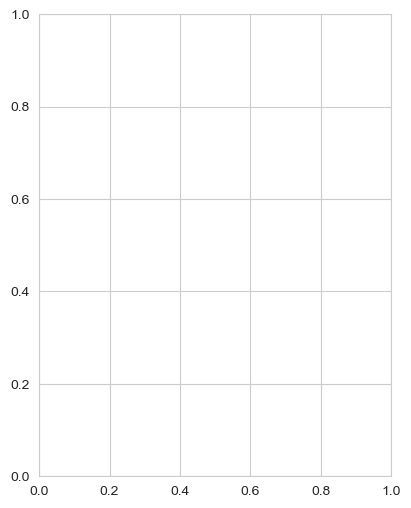

In [241]:
fig = plt.figure(figsize=(10,6))

plt.subplot(1,2,1)

plot_decision_regions(data=X1, features=features, classes='quality')
plt.title('Unscaled data')
plt.gca().set_aspect(1)
plt.tight_layout()

plt.subplot(1,2,2)

plot_decision_regions(X=X1_ms, y=y1)
plt.title('Scaled data')
plt.gca().set_aspect(1)

plt.suptitle('Wine data, 2 classes')

plt.tight_layout()

plt.show()

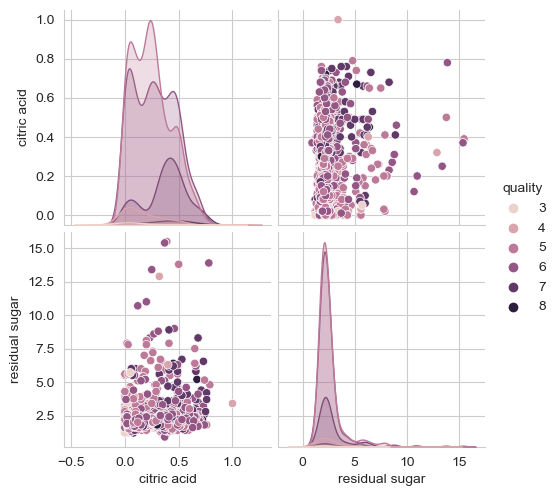

In [242]:
sns.pairplot(data = X1, hue='quality')

In [244]:
def do_NN(k, classes, scaling, classifier):
    if classes == 2:
        dataframe = X1
    else:
        dataframe = X1
        
    X = dataframe[features]
    y = dataframe['quality']
    
    # Build processing pipeline
    pipe_list = []
    
    # Add scaler
    if scaling == 1:
        pipe_list.append(('scaler', StandardScaler()))
    elif scaling == 2:
        pipe_list.append(('scaler', MinMaxScaler()))

    # Add classifier
    if classifier == 1:
        pipe_list.append(('clf', KNeighborsClassifier(k, algorithm='brute')))
    elif classifier == 2:
        pipe_list.append(('clf', NearestCentroid()))
        
    pipe = Pipeline(pipe_list)

    pipe.fit(X, y)

    o = pipe.predict(X.values)   # Unfortunately .predict() does not work with Pandas DF!
    cm = confusion_matrix(y, o)

    plt.figure(figsize=(12,6))
    
    plt.subplot(1,2,1)
    plot_decision_regions(data=dataframe, features=features, classes='quality', classifier=pipe)

    plt.scatter(unknown_x[0], unknown_x[1], c='k', s=2*plt.rcParams['lines.markersize']**2, marker='x')
    plt.title(f'Wine data, {classes} classes, {k}-NN')

    plt.subplot(1,2,2)

    cmd = ConfusionMatrixDisplay(cm, display_labels=pipe.classes_).plot(cmap='Blues', ax=plt.gca())
    plt.grid(False)

    plt.tight_layout()
    plt.show()

    print(f'Accuracy: {100*accuracy_score(y, o):.1f}\n\n\n')    

interactive(children=(IntSlider(value=1, continuous_update=False, description='k', max=50, min=1), Dropdown(de…

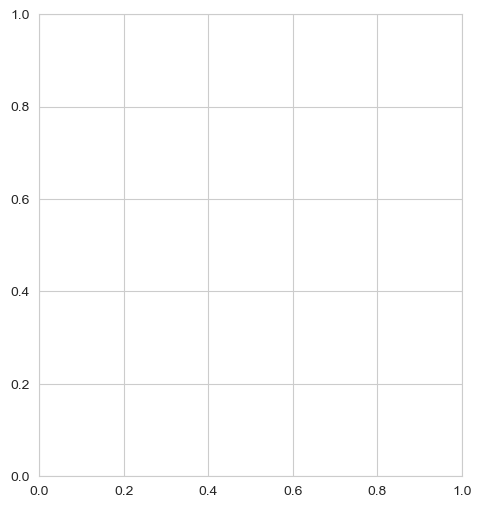

In [245]:
interactive(do_NN, 
            k=IntSlider(value=1, min=1, max=50, step=1, continuous_update=False),
            classes=Dropdown(options=[('2 class problem', 2), ('3 class problem', 3)], index=0),
            scaling=Dropdown(options=[('No scaling', 0), ('StandardScaler', 1), ('MinMaxScaler', 2)], index=0),
            classifier=Dropdown(options=[('kNN', 1), ('Nearest Centroid', 2)], index=0)
           )

## Classification with the breast cancer dataset

Compare te results of nearest neighbor classifiers using the breast cancer dataset against the logistic regression.

<ol>
<li> Use the same features or feature combinations that you used for logistic regression.
<li> If you use a 2-dim feature vector you can use the function plot_decision_regions() for a visualization of the result
<li> What is the best classifier and how does it perform compared to the logistic regression from te last exercise sheet
</ol>    

In [ ]:
cancer.head()